# Telco Customer Churn  Analysis (EDA)

In [2]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns 

In [3]:
#Creating a dataframe 
df=pd.read_csv('ChurnData.csv')

In [4]:
pd.set_option("display.max_columns",None)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. Initial Analysis

In [6]:
#Checking Shape of the data. 
df.shape

(7043, 21)

In [7]:
#Checking Column names 
print(df.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [8]:
#Checking Datatypes of each columns 
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


* Total Charges should have Numeric data type but instead its having categorical data.

In [10]:
# Analyze the Descriptive Statistics of the numerical columns.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Analysis
* Senior Citizen should have been a categorical column but instead it is numeric where it has (0= No Senior citizen , 1=Is Senior citizen).
* Average Tenure of Customers is 32 months. And 75 % of customers have less than 55 months of tenure.
* Average Charges paid for service is $64.75 while 75 % of people pay less than 89.9 dollars as monthly charges.
  
* 50 % of customers pay less than $70 as monthly charges.

In [12]:
# Analyzing a Target variable 
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
# Percentage of Churning customers. 
print(100*df['Churn'].value_counts()/len(df['Churn']))

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


* Churning rate is almost 26.5 % .

Text(0.5, 1.0, 'Churning Rate Analysis')

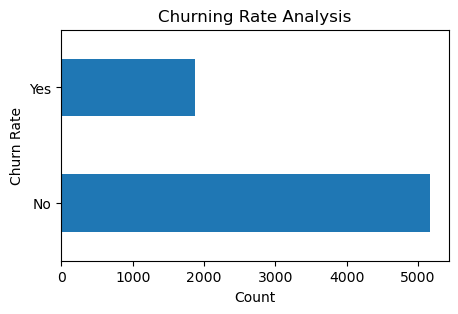

In [15]:
# Plotting Visually.
df['Churn'].value_counts().plot(kind='barh',figsize=(5,3))
plt.xlabel('Count')
plt.ylabel('Churn Rate')
plt.title('Churning Rate Analysis')

### 2. Identifying Missing Data.

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, 'Percentage of Missing values')

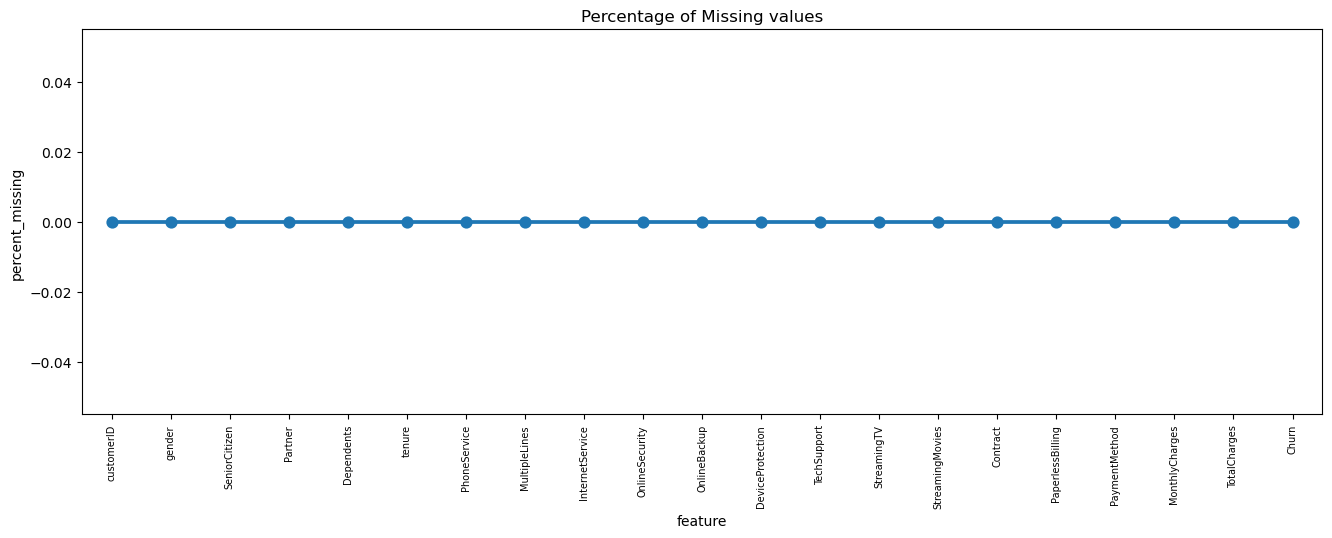

In [18]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
missing.columns = ['feature', 'percent_missing']

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='feature', y='percent_missing', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")


* There are no missing values in the data.
* We just nead to handle invalid data and types.

In [20]:
# Analyzing Unique values from each column except numeric . 
numeric_cols=df.select_dtypes(include='number').columns
for col in df.columns:
    if col not in numeric_cols:
        print(f"{col} : {df[col].unique()}")
        print('-'*70)


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
gender : ['Female' 'Male']
----------------------------------------------------------------------
Partner : ['Yes' 'No']
----------------------------------------------------------------------
Dependents : ['No' 'Yes']
----------------------------------------------------------------------
PhoneService : ['No' 'Yes']
----------------------------------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
----------------------------------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
-----------------------------------

* Here 'TotalCharges' is needed to be taken care of.
* 'SeniorCitizens' should have been categorical but its numeric (Although it doesnt cause anything odd as we will convert categorical values to numeric at time of model building)
* Rest all columns are categorical and have no invalid types.

### 3. Data Cleaning

In [23]:
new_df=df.copy() # Backup if anything goes wrong. 

In [24]:
# Changing total charges to numeric. 
new_df['TotalCharges']=pd.to_numeric(new_df['TotalCharges'],errors='coerce')

In [25]:
# Checking for null values.
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Total Charges tend to have 11 missing values . There were no missing values before.
* As there are only 11 missing values (0.15 %) we can consider of deleting them as it will not result into heavy data loss.

In [27]:
new_df.dropna(how='any',inplace=True)

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### 3. Outliers Detection and Treatment.

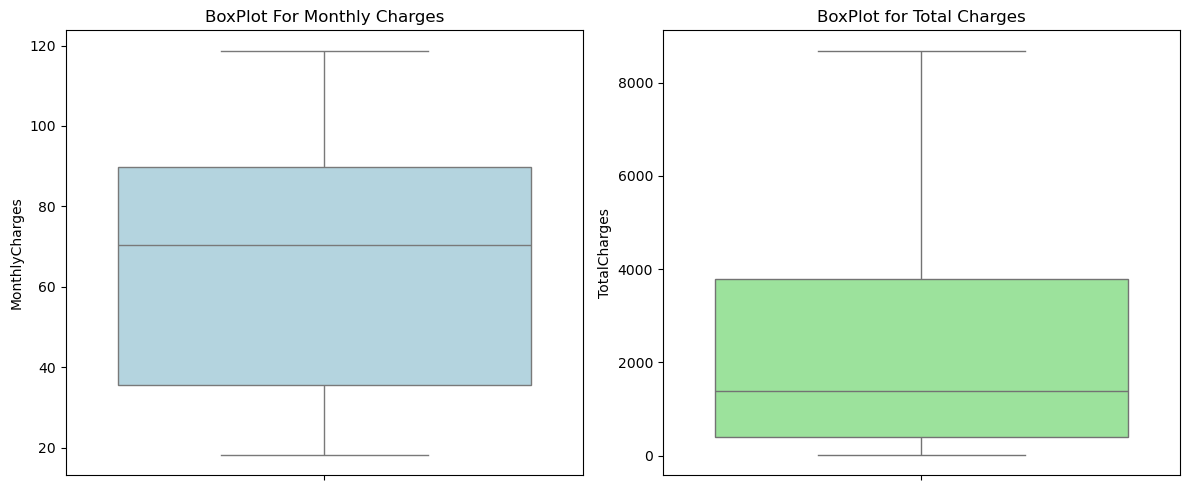

In [30]:
# Checking outliers for extreme values only. 
plt.figure(figsize=(12,5))
# For Monthly Charges.
plt.subplot(1,2,1)
sns.boxplot(y=new_df['MonthlyCharges'],data=new_df,color='lightblue')
plt.title('BoxPlot For Monthly Charges')

#for Total Charges. 
plt.subplot(1,2,2)
sns.boxplot(y=new_df['TotalCharges'],data=new_df,color='lightgreen')
plt.title('BoxPlot for Total Charges')

plt.tight_layout()
plt.show()

#### Insights 
* There are no possible outliers in extreme columns.

### 4. Feature Binning 

In [33]:
# For Tenure 
new_df['tenure'].max()

72

In [34]:
# Divide into bins (month wise 1-12 ,13-24,.....)
labels=['{0}-{1}'.format(i,i+11) for i in range(1,72,12)]
print(labels)

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']


In [35]:
new_df['Tenure_Bins']=pd.cut(new_df.tenure,range(1,80,12),right=False,labels=labels)
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Bins
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [36]:
new_df['Tenure_Bins'].value_counts()

Tenure_Bins
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

### 5. Removing Unwanted Columns

In [38]:
new_df.drop(columns=['customerID','tenure'],inplace=True)

## Data Exploration

### 1. Univariate Analysis

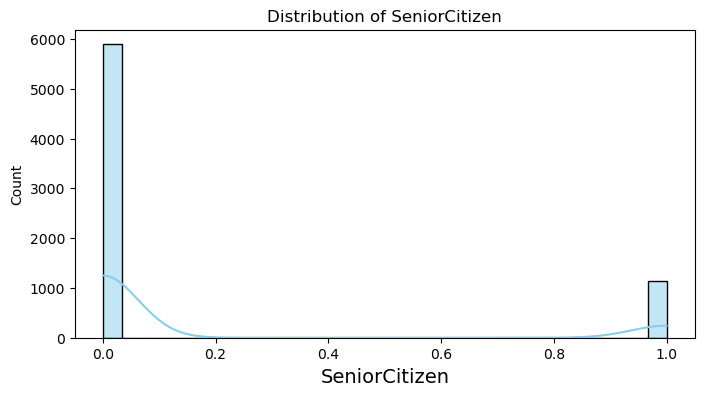

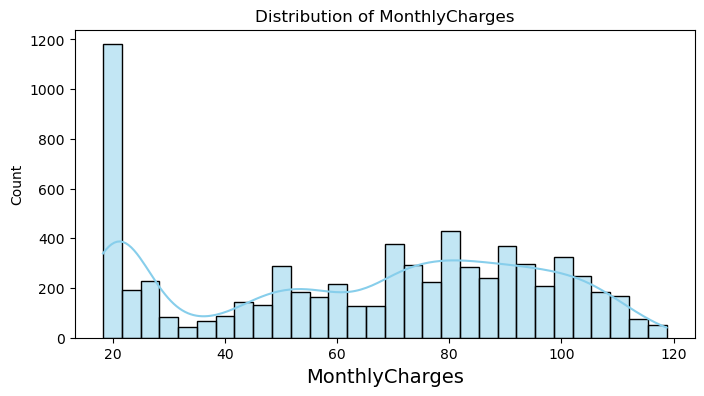

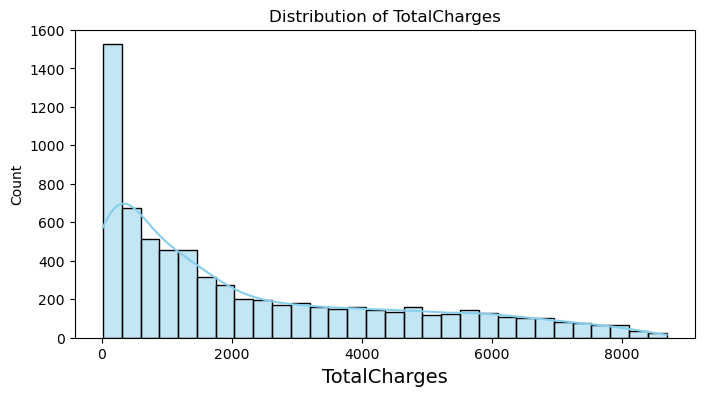

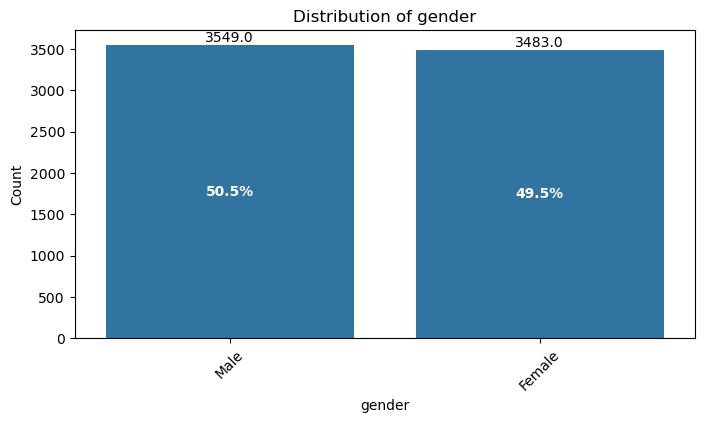

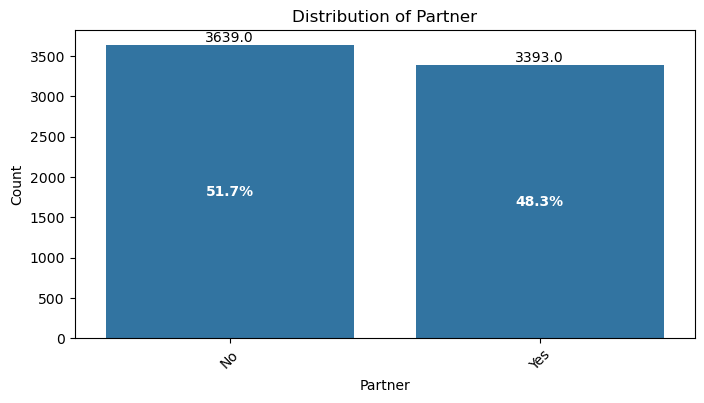

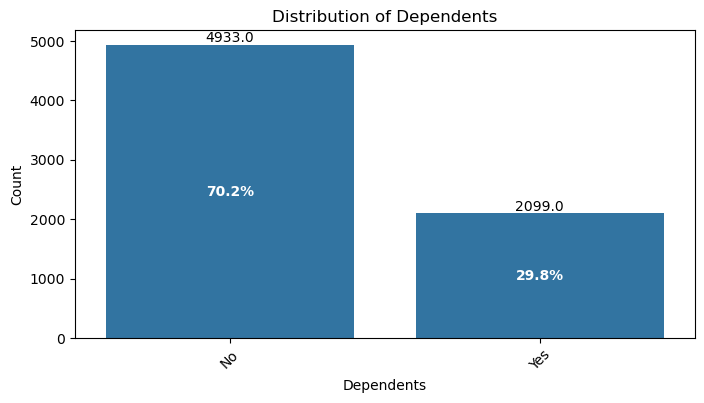

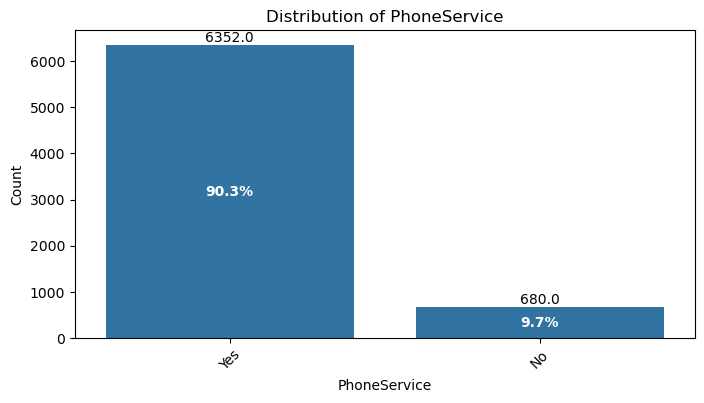

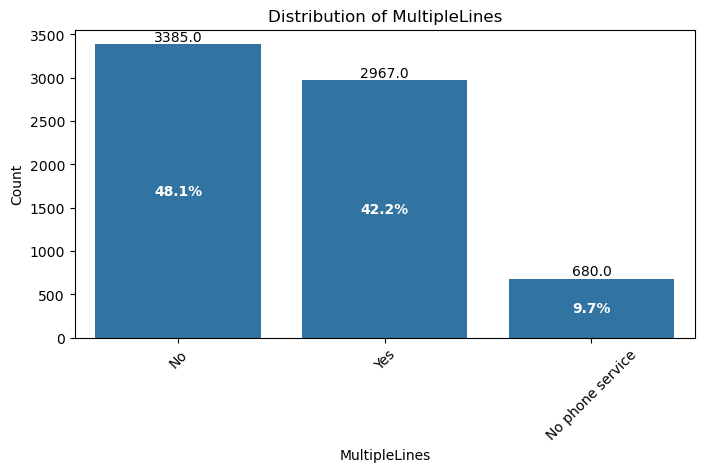

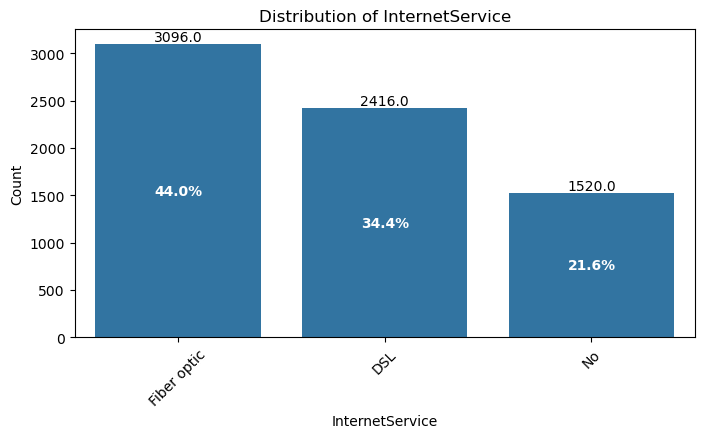

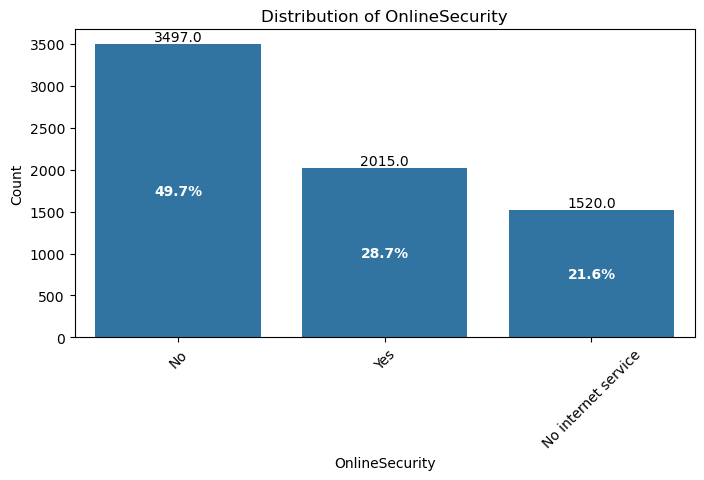

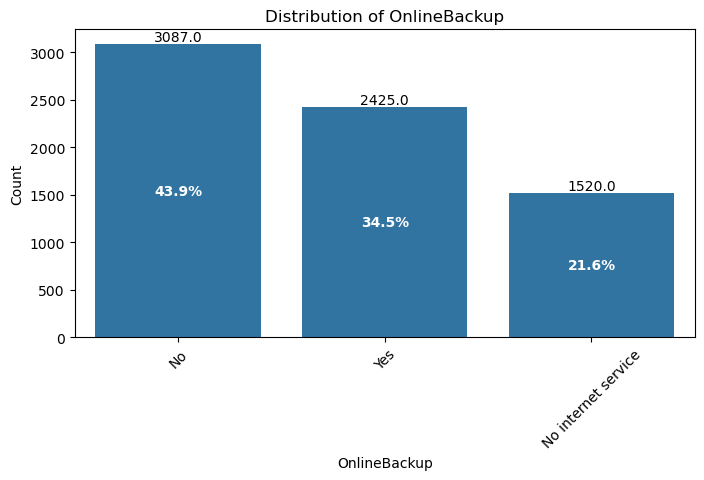

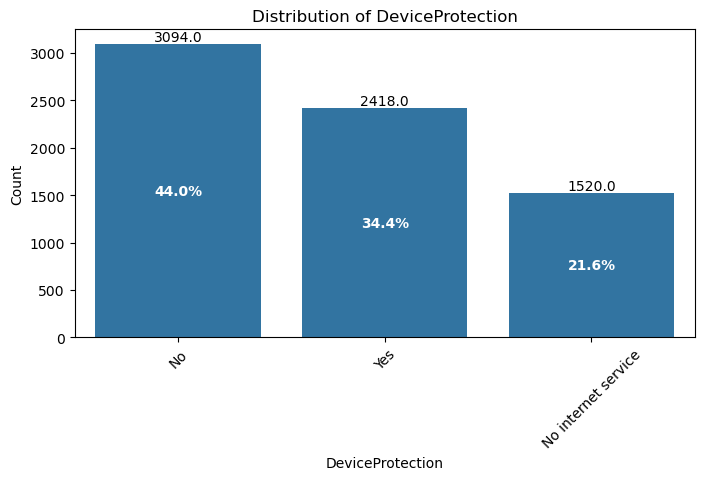

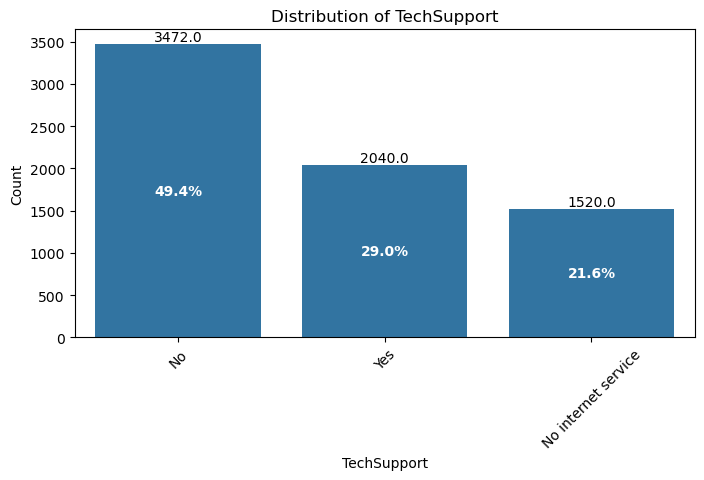

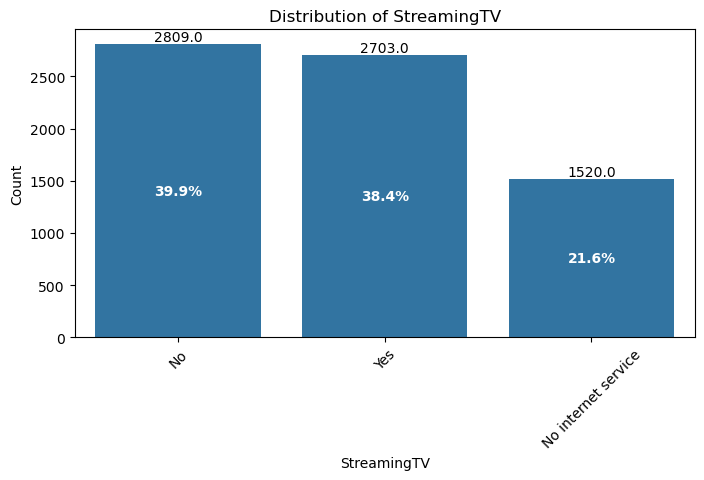

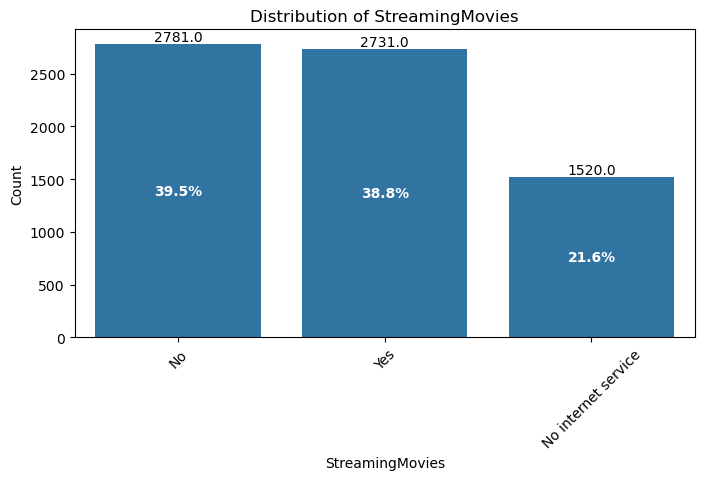

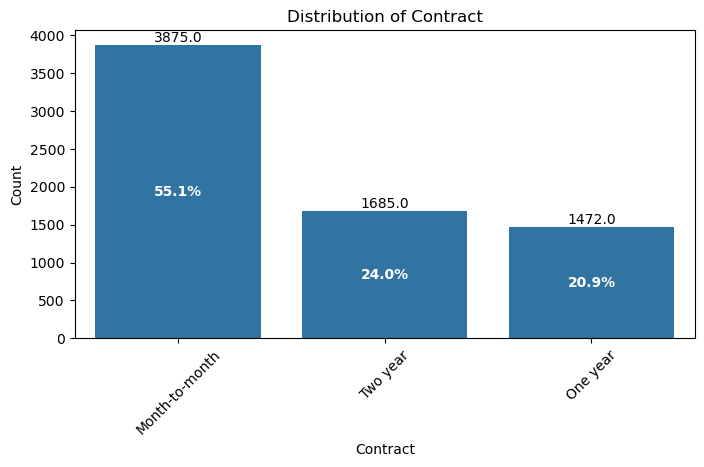

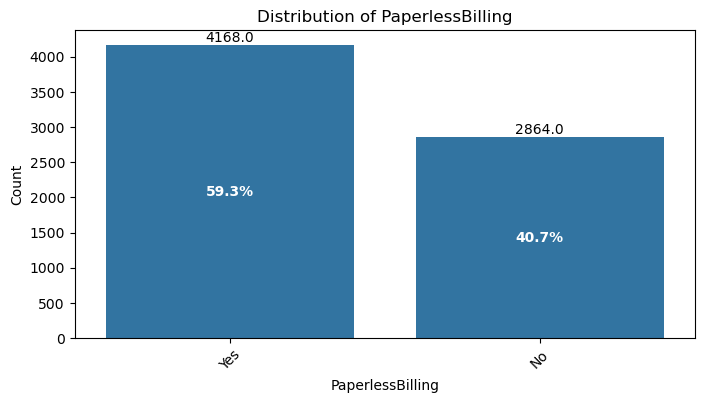

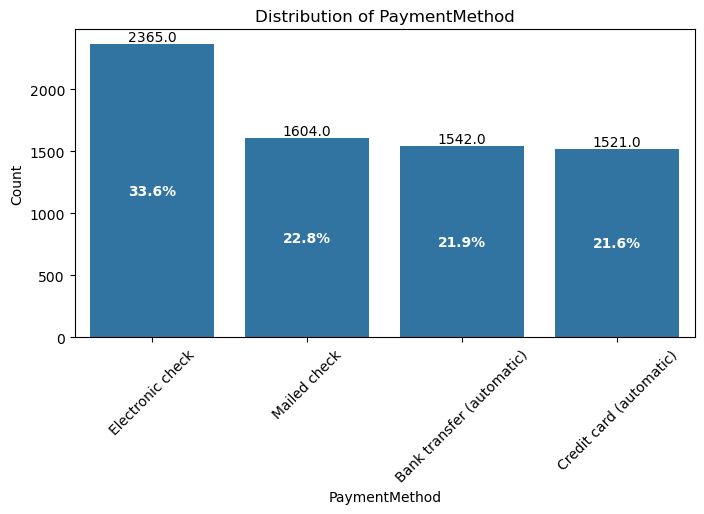

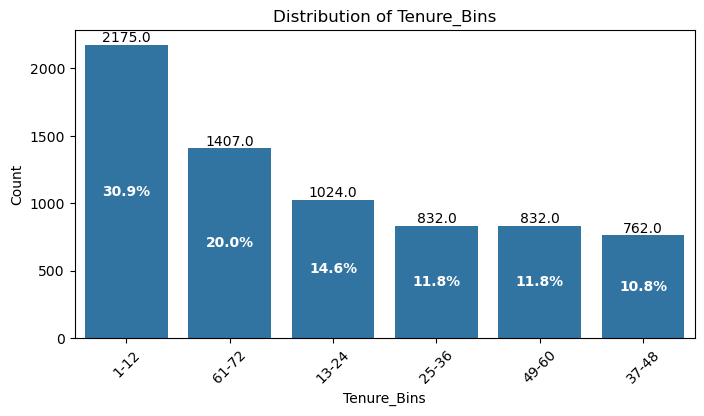

In [41]:
from IPython.display import display, HTML # For scrollable plots
# Separate numeric and categorical columns
numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = new_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Remove target column from analysis
target_col = 'Churn'
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

# Create scrollable div
display(HTML('<div style="max-height:700px; overflow-y:auto;">'))
# Plot Numeric columns.
for col in numeric_cols: 
    plt.figure(figsize=(8,4)) 
    sns.histplot(new_df[col], kde=True, bins=30, color='skyblue') 
    plt.title(f"Distribution of {col}") 
    plt.xlabel(col,fontsize=14) 
    plt.ylabel("Count") 
    plt.show()
# Plot categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    ax = sns.countplot(data=new_df, x=col,
                       order=new_df[col].value_counts().index)  # sorted bars
    plt.title(f"Distribution of {col}")
    plt.ylabel("Count")
    
    total = len(new_df)
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
        # Absolute count above the bar
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width()/2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')
        
        # Percentage inside the bar
        pct_y = height * 0.5  # adjust position inside bar
        ax.annotate(f'{100*height/total:.1f}%', 
                    (p.get_x() + p.get_width()/2., pct_y), 
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    
    plt.xticks(rotation=45)
    plt.show()

# Close scrollable div
display(HTML('</div>'))


### Insights -
#### 1. For Numerical Columns - 
* **1. Senior Citizens** - Most of the customers are **young** and very less amount of senior citizens are present.
* **2. Monthly Charges** - MonthlyCharges shows slight left skewness (−0.22), indicating a modest concentration of customers with higher-than-average billing.
* **3.Total Charges** - TotalCharges is right-skewed, indicating most customers have lower cumulative charges while a few have significantly higher lifetime billing.
#### 2. For Categorical columns -
* There are almost equal number of male and female customers.
* Customers with **No Dependents** are higher in numbers.
* **Fiber Optic** is more prefered Internet Service type.
* **Month-to-month** is majority of contract type.
* Customers make more use of **Electronic check** for payments.

### Feature Encoding

In [44]:
#Making 2 dataframes for churned an un-churned customers. 
df_not_churned = new_df[new_df['Churn']=='No']
df_churned=new_df[new_df['Churn']=='Yes']

In [45]:
# Crosstab Method Just for 
pd.crosstab(new_df.PaymentMethod,new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [46]:
# Converting Target Column to numerical by label encoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
new_df['Churn']=le.fit_transform(new_df['Churn'])

In [47]:
new_df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [48]:
# By pd.getdummies (One hot encoding)
new_df1=new_df.copy()

In [49]:
new_df1=pd.get_dummies(new_df1).astype(int)

In [50]:
new_df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Bins_1-12,Tenure_Bins_13-24,Tenure_Bins_25-36,Tenure_Bins_37-48,Tenure_Bins_49-60,Tenure_Bins_61-72
0,0,29,29,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


### Numerical Analysis

Text(0.5, 1.0, 'MonthlyCharges With TotalCharges')

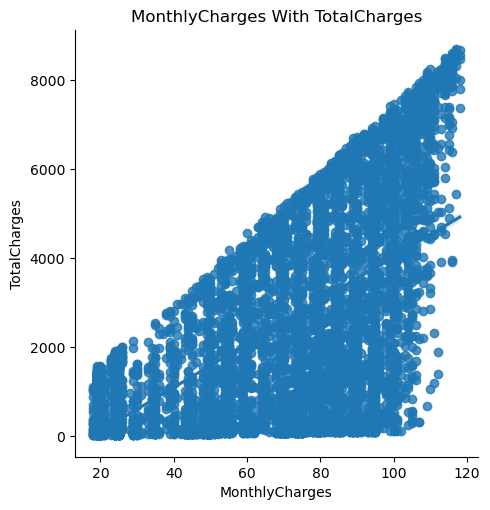

In [52]:
# Relationship between Monthly charges and total charges.
sns.lmplot(data=new_df1,x='MonthlyCharges',y='TotalCharges')
plt.title('MonthlyCharges With TotalCharges')

##### Insight - Total Charges are increasing with increasing monthly charges. Thus both features are correlated.

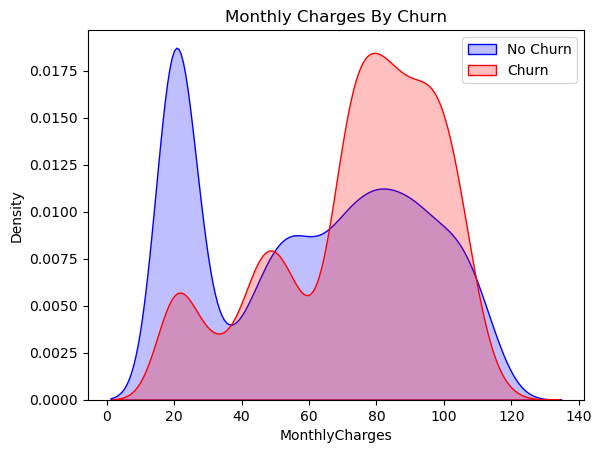

In [54]:
# Churn by Monthly Charges
mnt=sns.kdeplot(new_df1['MonthlyCharges'][new_df['Churn']==0],color='blue',fill=True)
mnt=sns.kdeplot(new_df1['MonthlyCharges'][new_df['Churn']==1],color='red',fill=True)
plt.legend(['No Churn','Churn'])
plt.title('Monthly Charges By Churn')
plt.show()

##### Insight-
* Higher the monthly charge higher the churn is observed.
* Low monthly charges attract more customers.

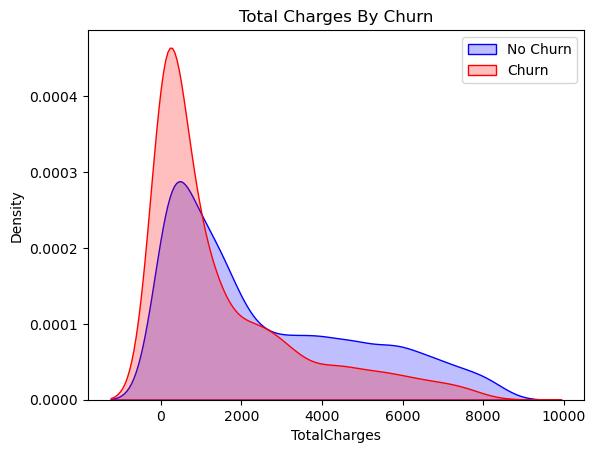

In [56]:
# Churn for Total Charges.
tch=sns.kdeplot(new_df1['TotalCharges'][new_df1['Churn']==0],color='blue',fill=True)
tch=sns.kdeplot(new_df1['TotalCharges'][new_df1['Churn']==1],color='red',fill=True)
plt.legend(['No Churn','Churn'])
plt.title('Total Charges By Churn')
plt.show()


##### Insight -
* Lower the total charges the higher churn is observed.
#### This states that - The customers Paying high monthly charges at a lower tenure have less total charges.Thus the features like tenure , monthly charges and total charges are highly correlated.
* Inshort the monthly charges are so high that results into a short tenure of the users and which directly affects the total charges.

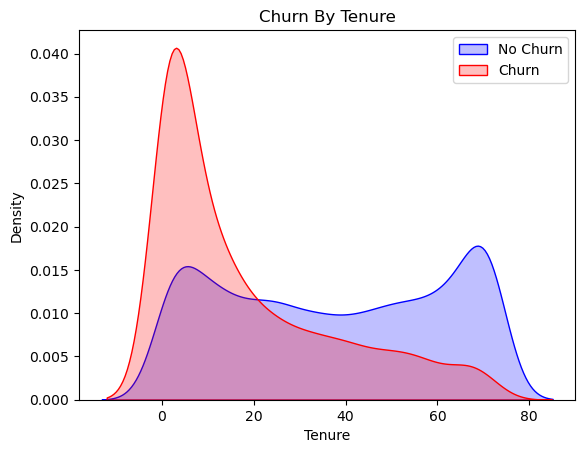

In [58]:
# Churn By tenure. 
tn=sns.kdeplot(df['tenure'][df['Churn']=='No'],color='Blue',fill=True)
tn=sns.kdeplot(df['tenure'][df['Churn']=='Yes'],color='red',fill=True)
plt.legend(['No Churn','Churn'])
plt.title('Churn By Tenure')
plt.xlabel('Tenure')
plt.show()

* Customers with lower tenure generally have high churn. It maybe because of higher monthly charges , Services , or Competition.

### Correlation W.R.T Target variable. 


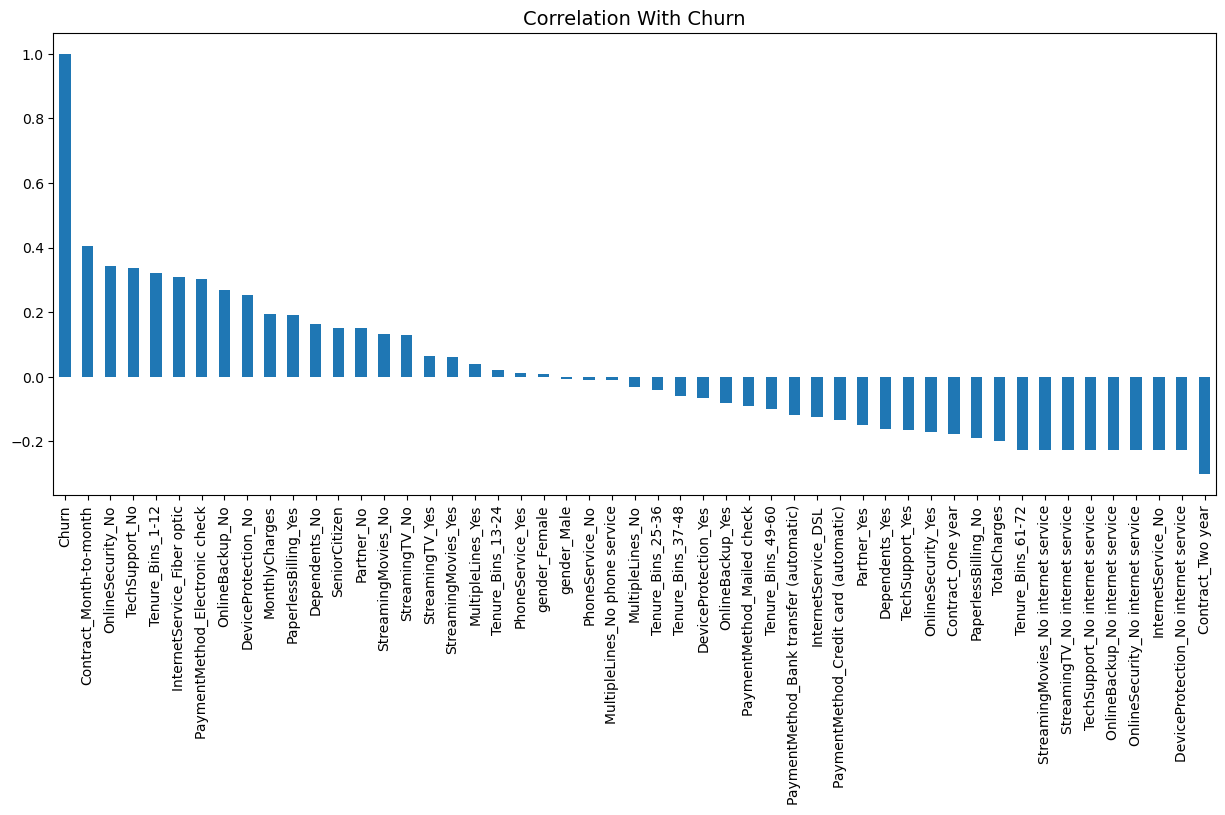

In [61]:
plt.figure(figsize=(15,6))
new_df1.corr(numeric_only=True)['Churn'].sort_values(ascending= False).plot(kind='bar')
plt.title('Correlation With Churn',fontsize=14)
plt.show()

### Insights(Assuming 0.2 and -0.2 as threshold for correlation)
*  **High Churn** is seen in case of **Monthly Contracts** , **No Tech support** , **No Online Backups** , **Fiber-optic connections** , **Customers Engaged for atleast 1 year** and **Payments Through Electronic Checks**.
* **Low Churn**  is seen in case of **Two-year contracts** , **Subscirbtions without internet service** , **Customers Engaged for 5+ years** .
* Features like **Gender** , **Subscribtions with Internet service** , **Phone Services** , **Multiple Lines** have **NO Impact** on churn.

### Correlation Heatmap

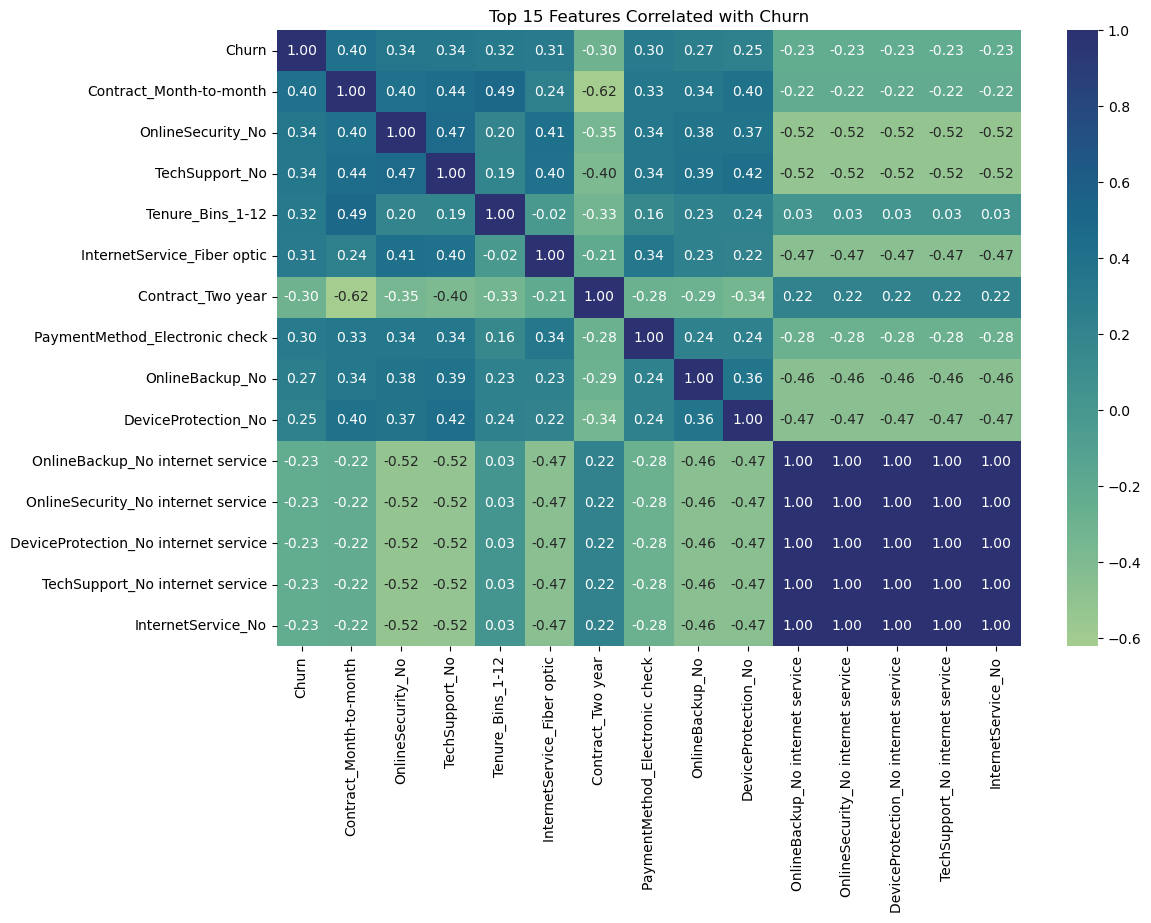

In [64]:
corr = new_df1.corr(numeric_only=True)['Churn'].abs().sort_values(ascending=False) #.abs() → we don’t care about sign (positive/negative), just strength.
top_features = corr.head(15).index

plt.figure(figsize=(12,8))
sns.heatmap(new_df1[top_features].corr(), annot=True, cmap="crest", fmt=".2f")
plt.title("Top 15 Features Correlated with Churn")
plt.show()


### Bivariate Analysis 

In [66]:
def uniplot(df, col, title, hue=None, show_pct=False):
    """
    Creates a styled countplot for a categorical variable with hue 
    and optional percentage annotations inside bars.

    Parameters:
    df           : DataFrame
    col          : str, column name to plot on x-axis
    title        : str, title of the plot
    hue          : str (optional), column name for hue separation
    show_pct : bool (optional), whether to display percentages inside bars
    """
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data=hue) if hue is not None else pd.Series()
    fig, ax = plt.subplots()

    width = len(df[col].unique()) + 7 + (4 * len(temp.unique())) if not temp.empty else 10
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    plt.title(title)

    # removed log scale → linear scale for counts
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,
                       hue=hue, palette='bright')

    # Optionally show percentages on bars
    if show_pct:
        total = len(df)
        for p in ax.patches:
            height = p.get_height()
            if height == 0:
                continue  # skip empty bars
            percentage = f'{100 * height / total:.1f}%'
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=12, color='black')

    plt.show()


### 1.Analysis with Demographics 

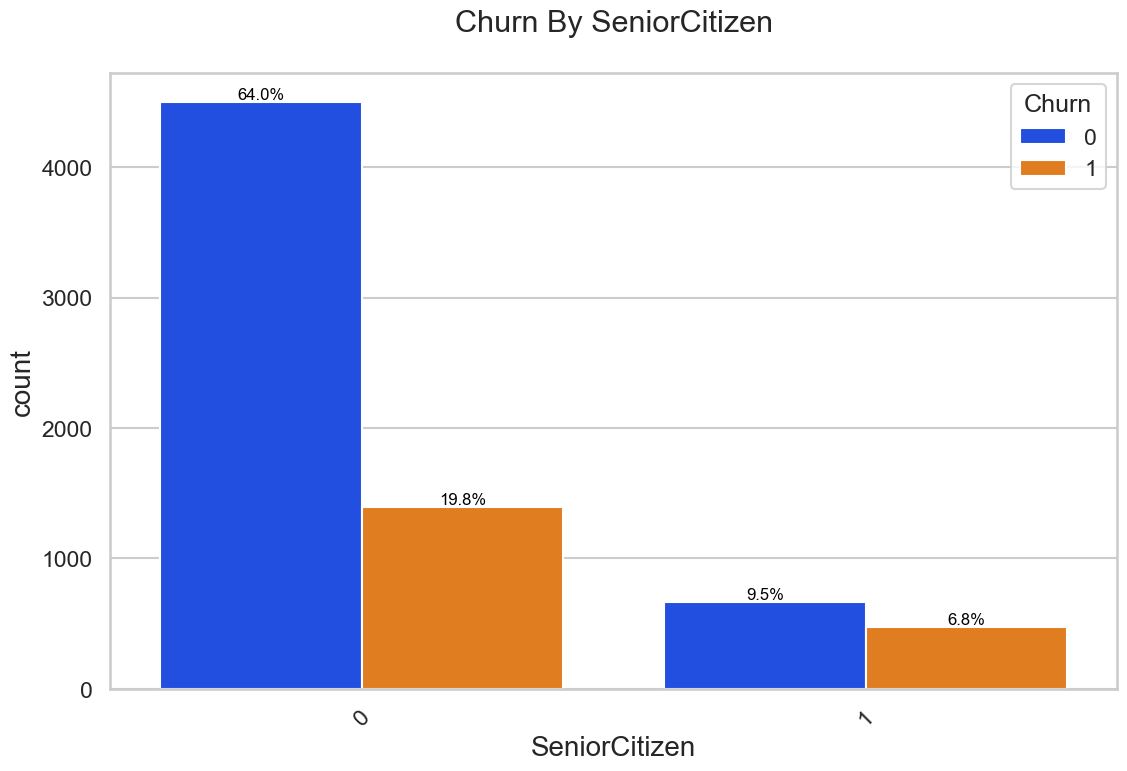

In [71]:
# Churn by Senior citizens.
uniplot(new_df1,col='SeniorCitizen',title='Churn By SeniorCitizen',hue='Churn',show_pct=True)

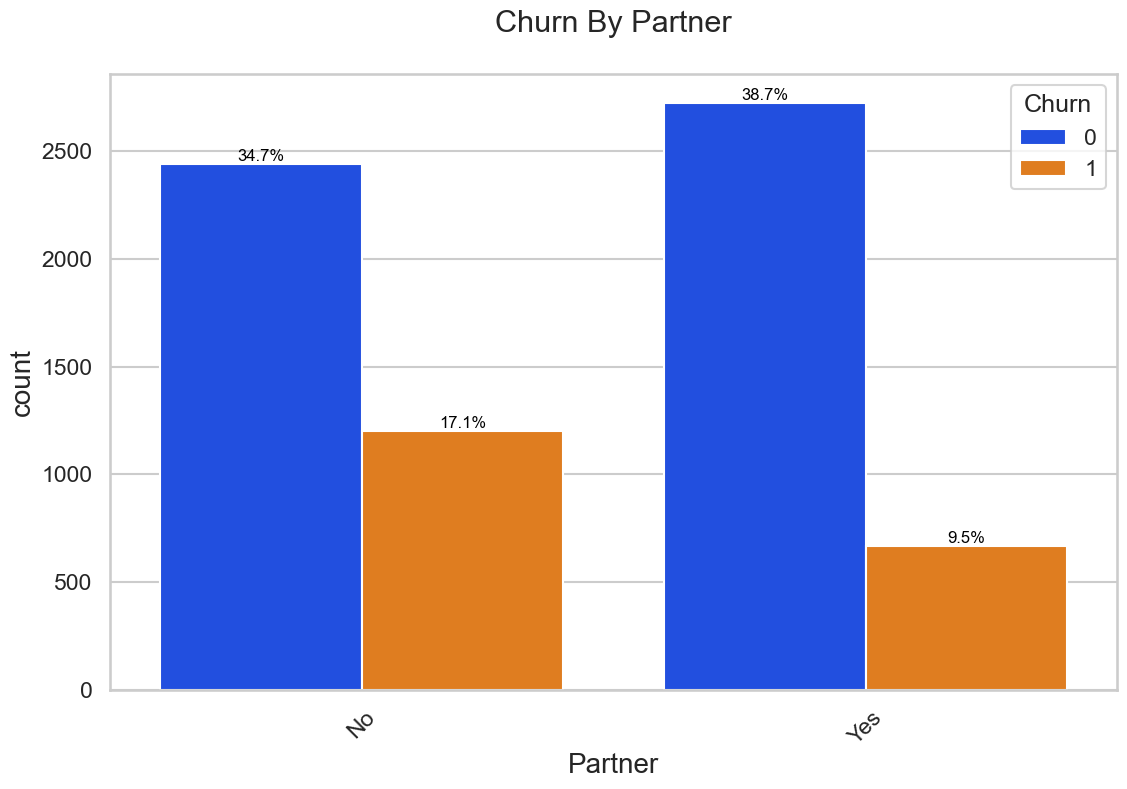

In [73]:
# Churn by Partners.
uniplot(new_df,'Partner',hue='Churn',title='Churn By Partner',show_pct= True)

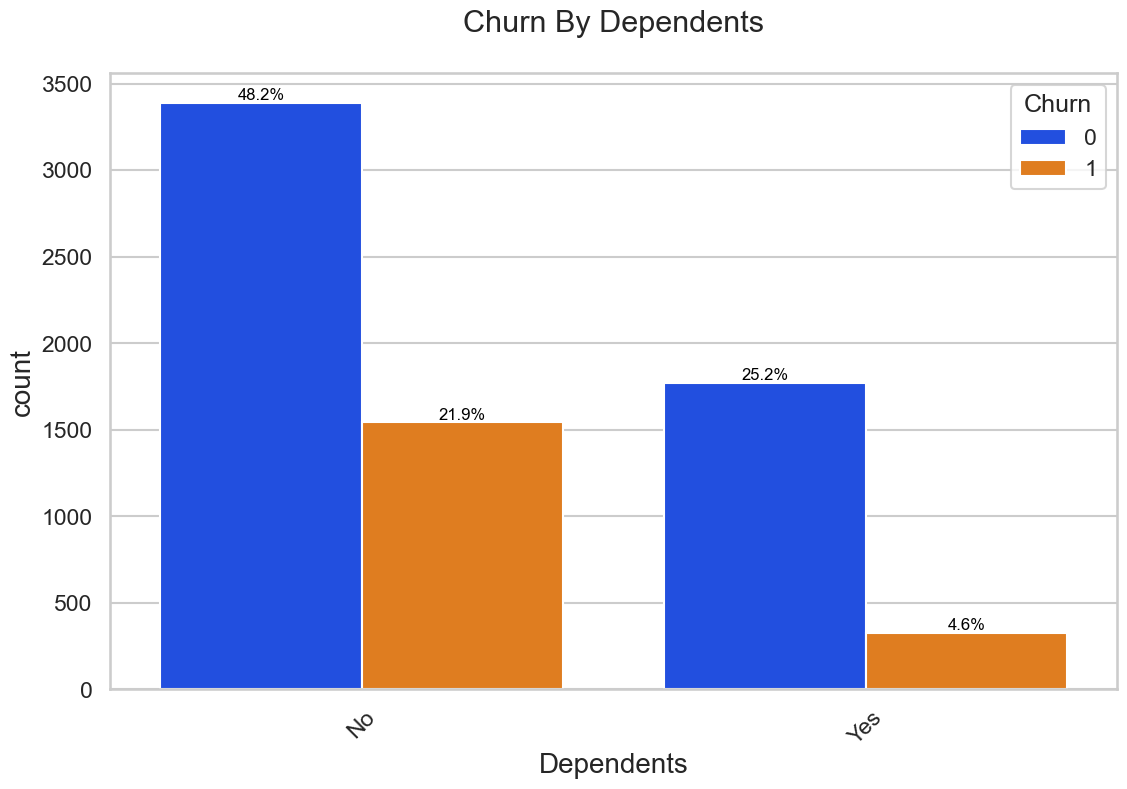

In [75]:
# Churn by Dependents
uniplot(new_df,'Dependents',hue='Churn',title='Churn By Dependents',show_pct= True)


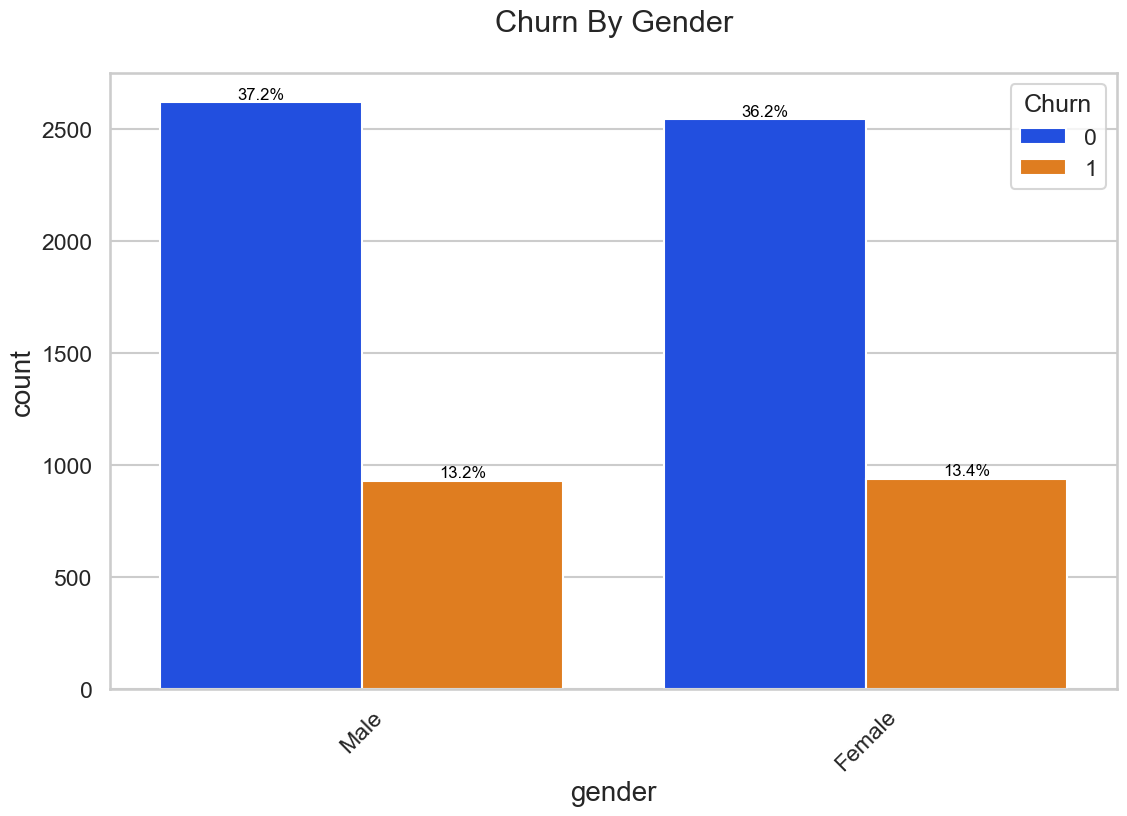

In [77]:
# Churn by Gender 
uniplot(new_df,'gender',hue='Churn',title='Churn By Gender',show_pct= True)


### Insights By Demographics - 
#### 1. By Gender - 
* No significant impact of **Gender** was seen on **Churn** .
#### 2. By Senior Citizens
* Although **Senior Citizens** are in less numbers as compared to young customers ; more churn was observed in senior citizens **(41.7 % churn)** .
#### 3. By Dependents 
* **2X Churn** (31.2%) was observed in customers with **No Dependents** than customers **With Dependents** (15.4%).
#### 4. By Partners
* **More Churn** (33 %) was seen in customers with **No Partners** than customers **with Partners** (19%). 

### 2. Analysis with Services and subcribtions.

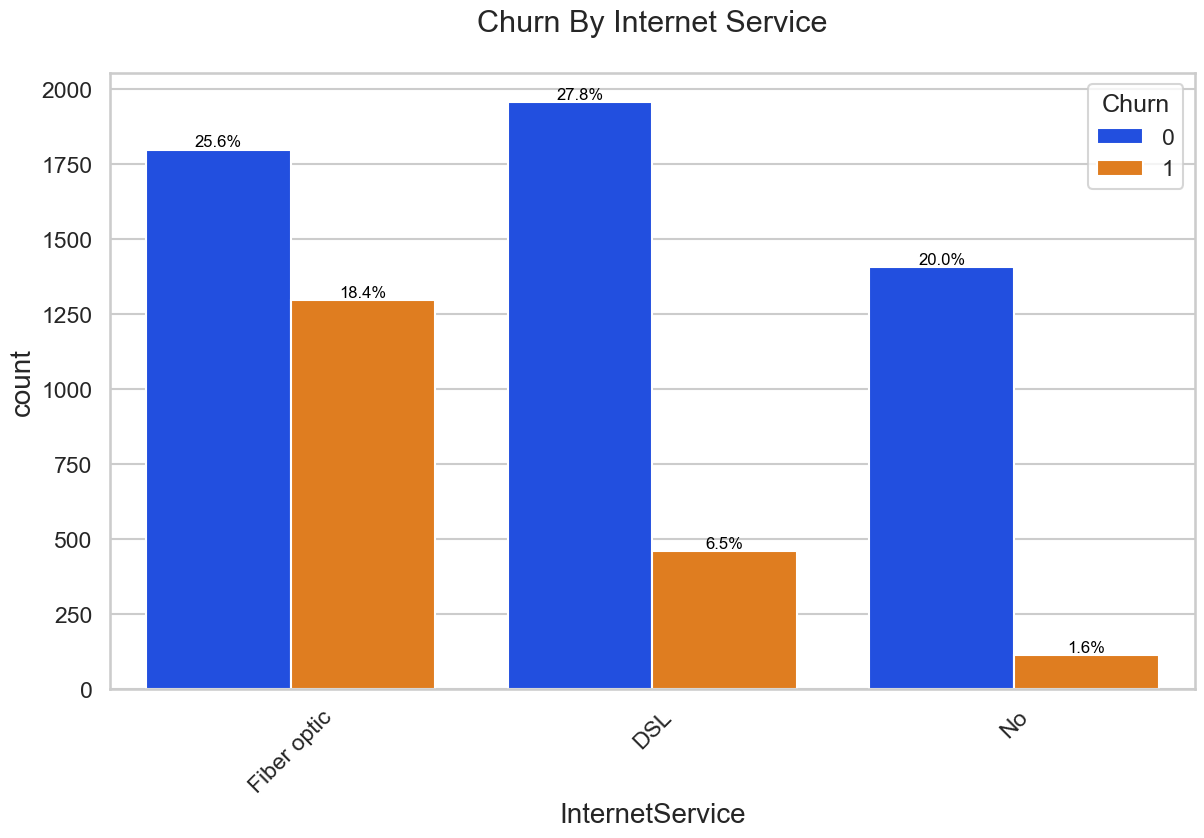

In [79]:
# Churn by Internet Service.
uniplot(new_df,col='InternetService',title='Churn By Internet Service',hue='Churn',show_pct=True)

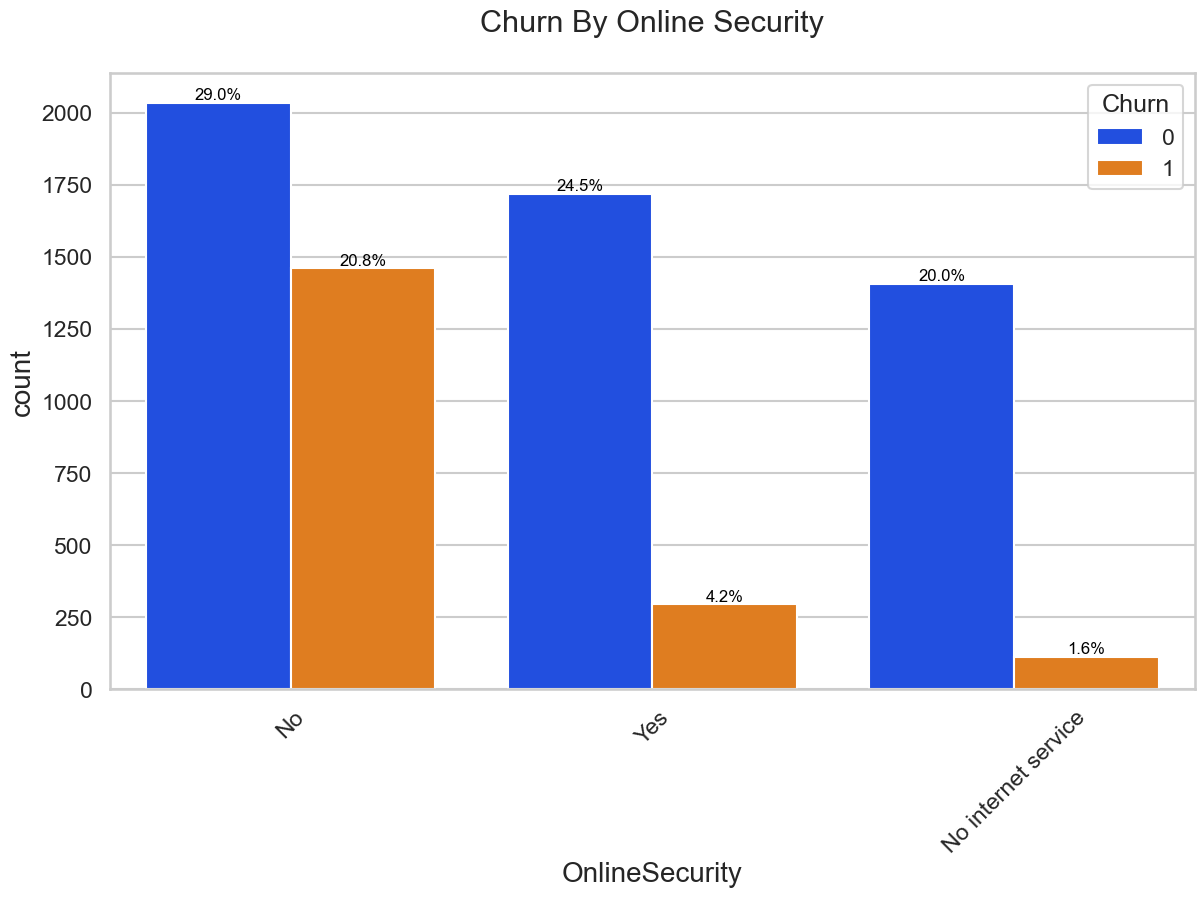

In [81]:
# Churn by online security .
uniplot(new_df,col='OnlineSecurity',title='Churn By Online Security',hue='Churn',show_pct=True)

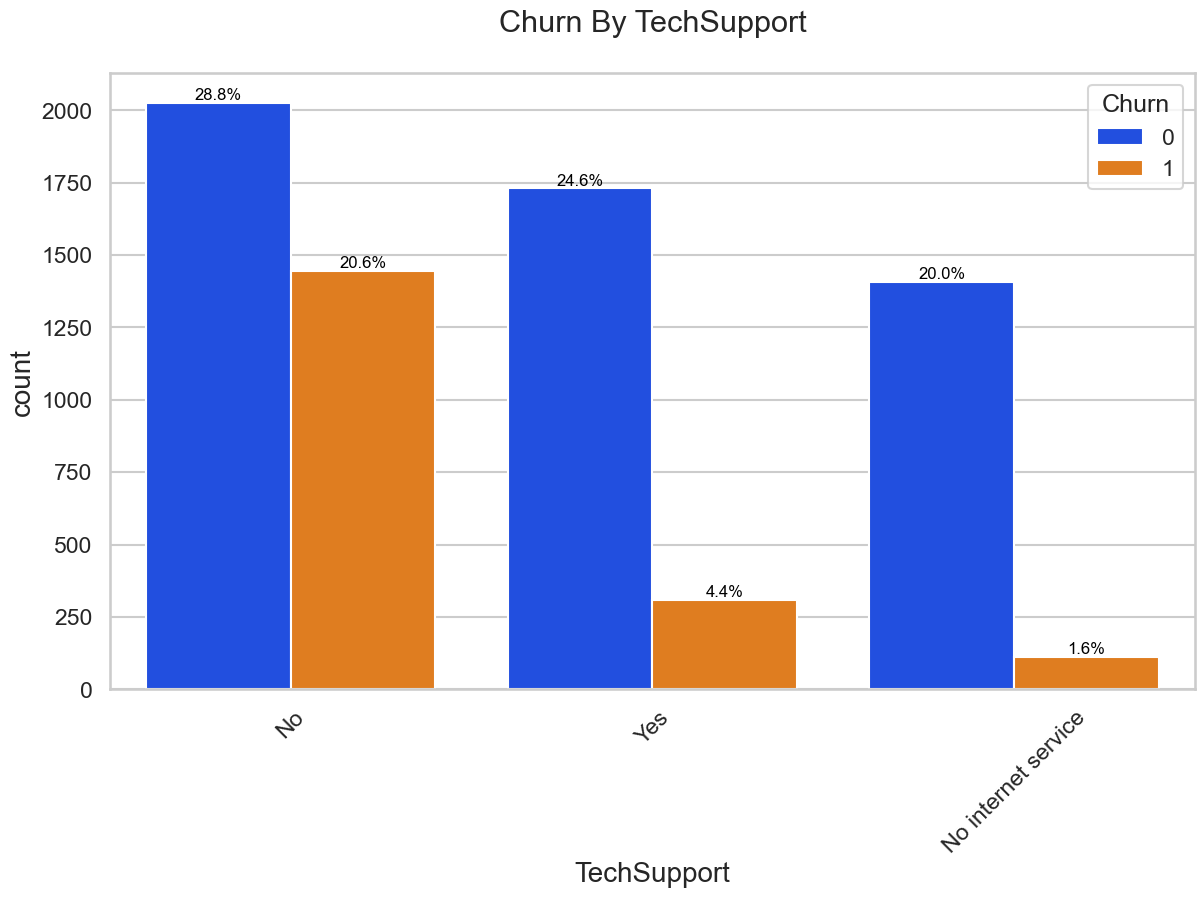

In [83]:
# Churn By tech support. 
uniplot(new_df,col='TechSupport',title='Churn By TechSupport',hue='Churn',show_pct=True)

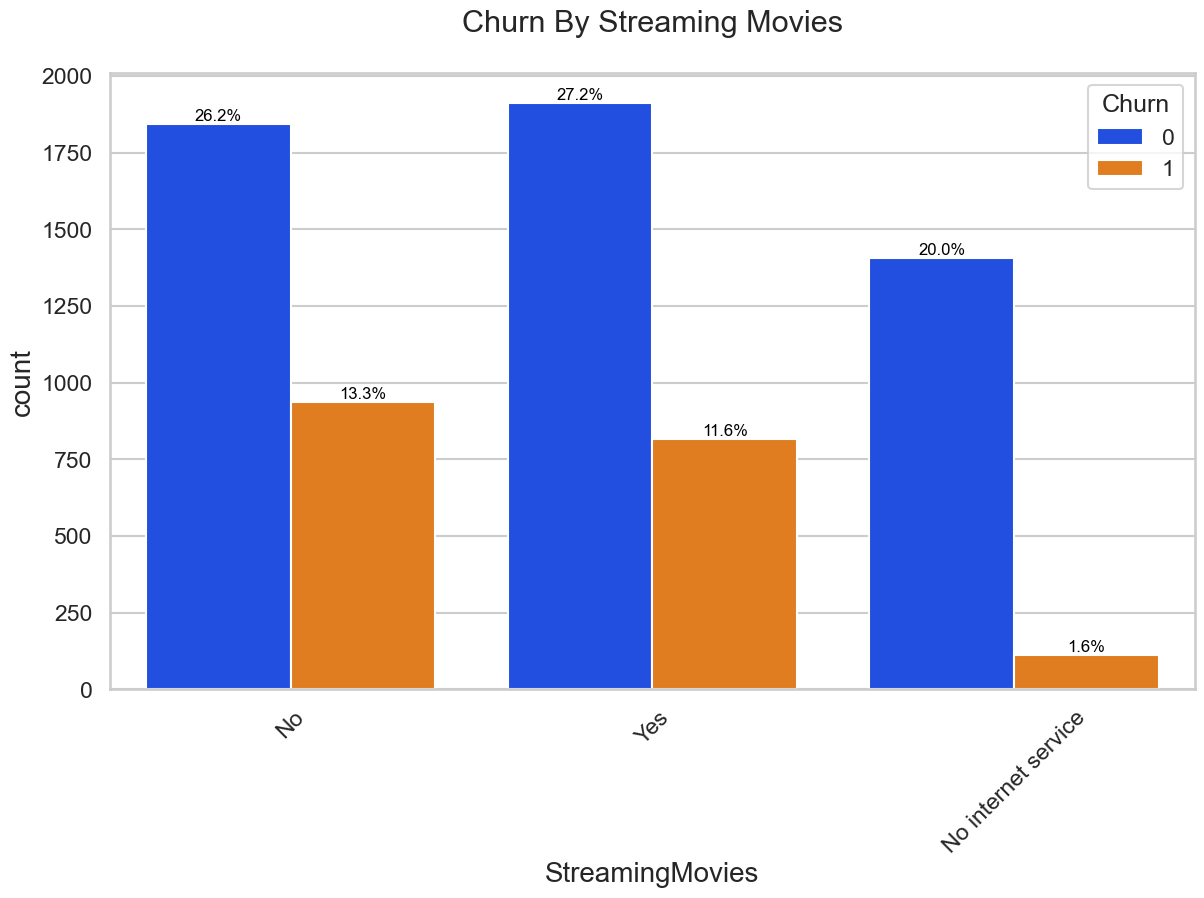

In [85]:
# Churn By StreamingMovies. 
uniplot(new_df,col='StreamingMovies',title='Churn By Streaming Movies',hue='Churn',show_pct=True)

### Insights by Services and Subcriptions
#### 1. By Internet Service -
* **More Churn** was observed in customers using **Fiber Optic** Connections (41%) .
#### 2. By Online security and Backups -
* Customers with **No Facilities** of **Online Security**  and  **Online Backup** tend to **Churn** more.
#### 3. By tech Support -
* There are very high amount of customers without **Tech Support** leading to the **Churn** .
#### 4. By Subcriptions -
* Customers without subcribtions to **Streaming Movies** and **Streaming TV** are more churners.

### 3. Analysis by Contract and Billing.

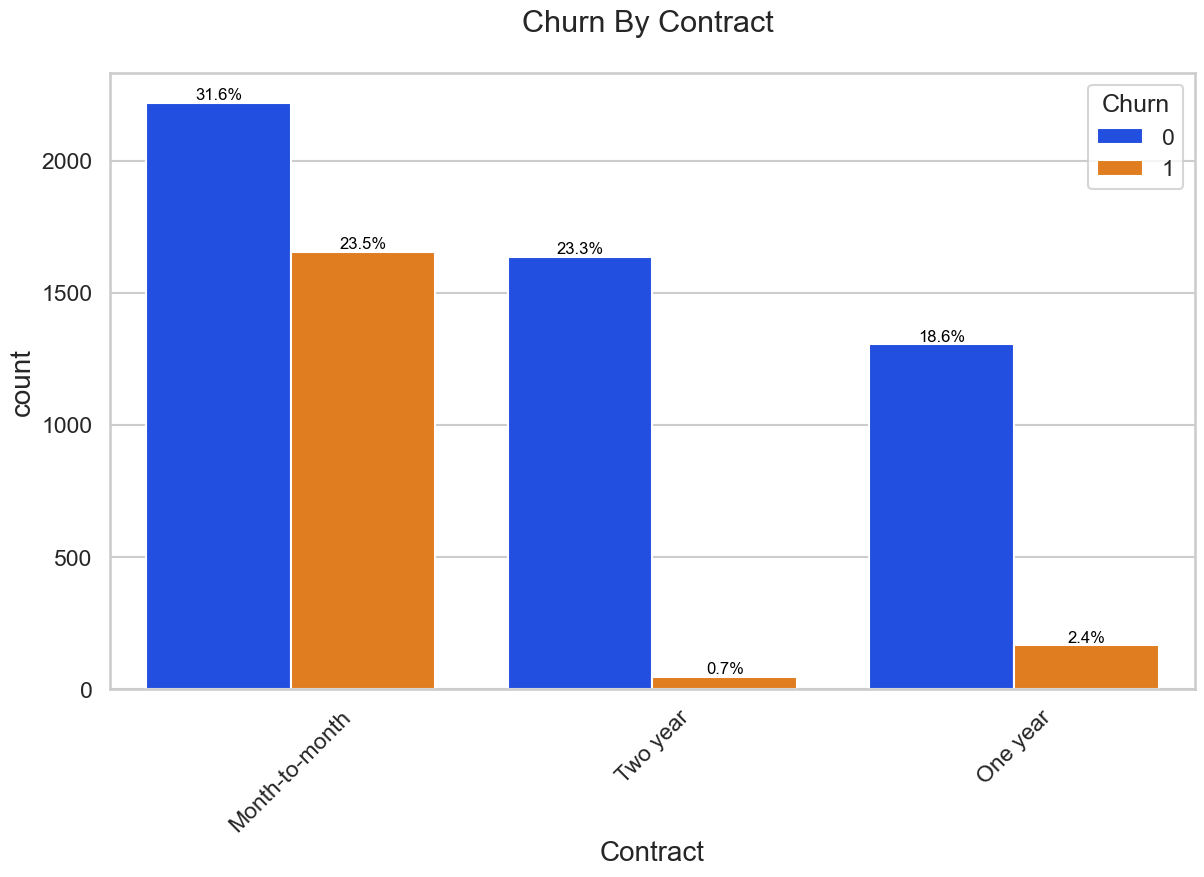

In [87]:
# Churn By contracts . 
uniplot(new_df,col='Contract',title='Churn By Contract ',hue='Churn',show_pct=True)

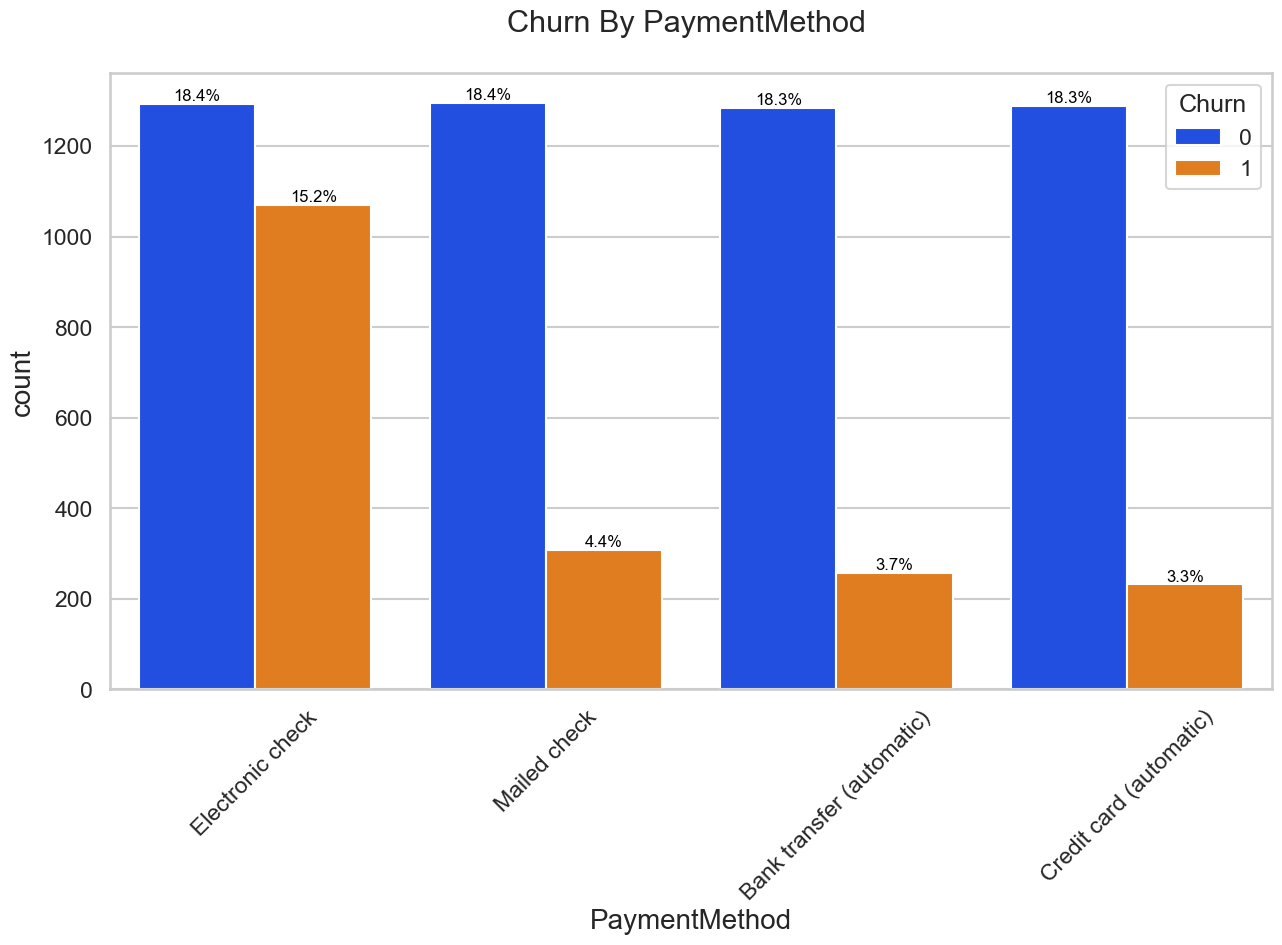

In [89]:
# Churn by Payment method.
uniplot(new_df,col='PaymentMethod',title='Churn By PaymentMethod ',hue='Churn',show_pct=True)


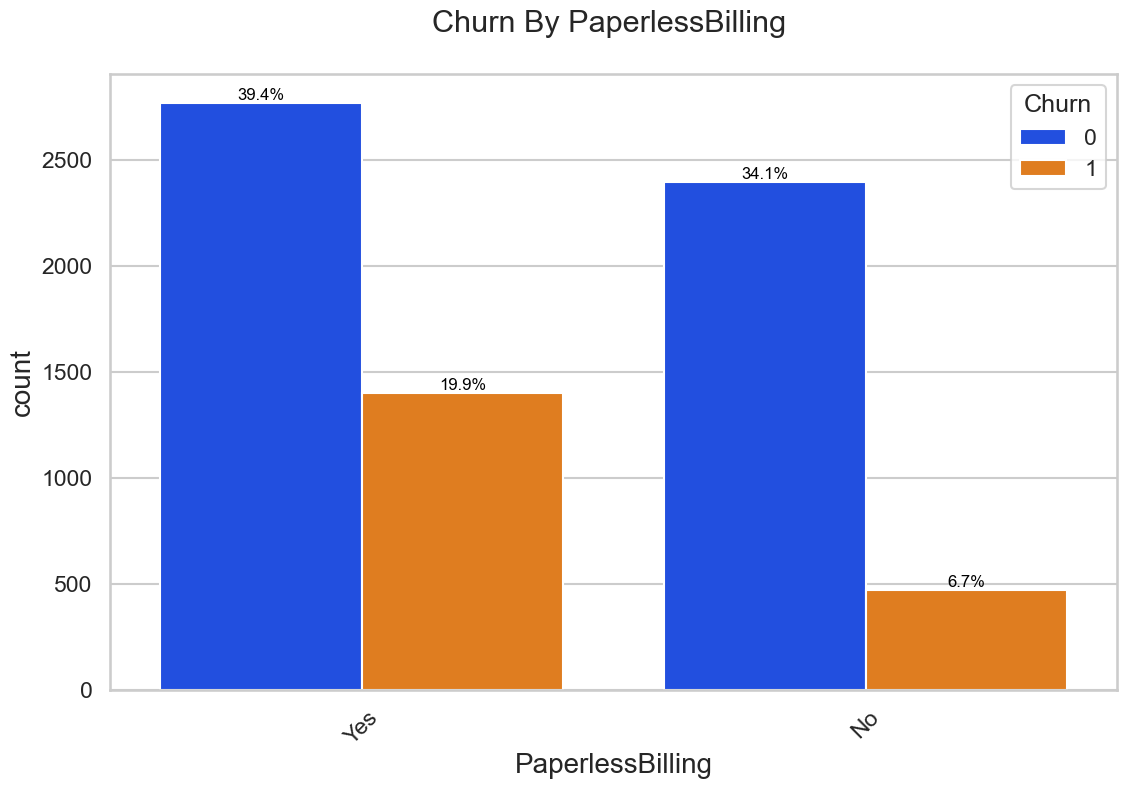

In [91]:
#Churn by PaperlessBilling
uniplot(new_df,col='PaperlessBilling',title='Churn By PaperlessBilling ',hue='Churn',show_pct=True)

### Insights By Contract and billing-
#### 1. By Contract -
* Customers with **Month-to-Month** contracts are more Churners (42.6 %).
* Customers with **Two Year Contracts** and **One Year Contracts** are less churners.
* It's obvious as the people with yearly contracts cannot leave till the contracts expire while people with monthly contracts can possilbly churn earlier.
#### 2. By Payment Methods -
* Customers paying via **Electronic Check** tend to churn more.
#### 3. By Billing Type - 
* Customers using **Paperless Billing** facility tend to churn more.

### 4. Analysis by Tenure.

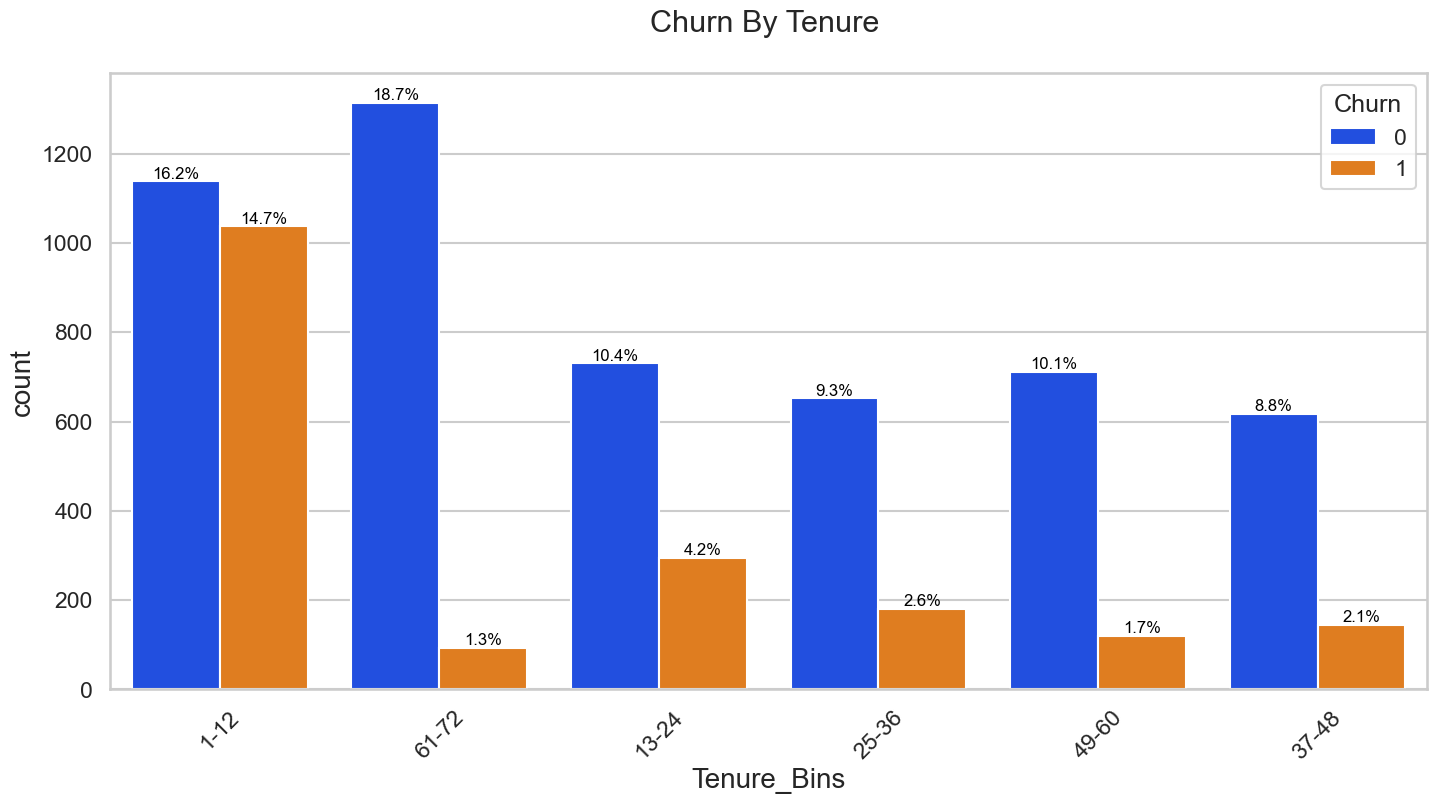

In [95]:
uniplot(new_df,col='Tenure_Bins',title='Churn By Tenure ',hue='Churn',show_pct=True)

### Insights - 
* Customers with tenure of atleast **One Year** are more churners.
* Customers engaged for more than **5+** years are higher **retainers** .

## Multivariate analysis

### 1. Scatter Plot 
Deep dive into tenure vs monthly charges by churn.

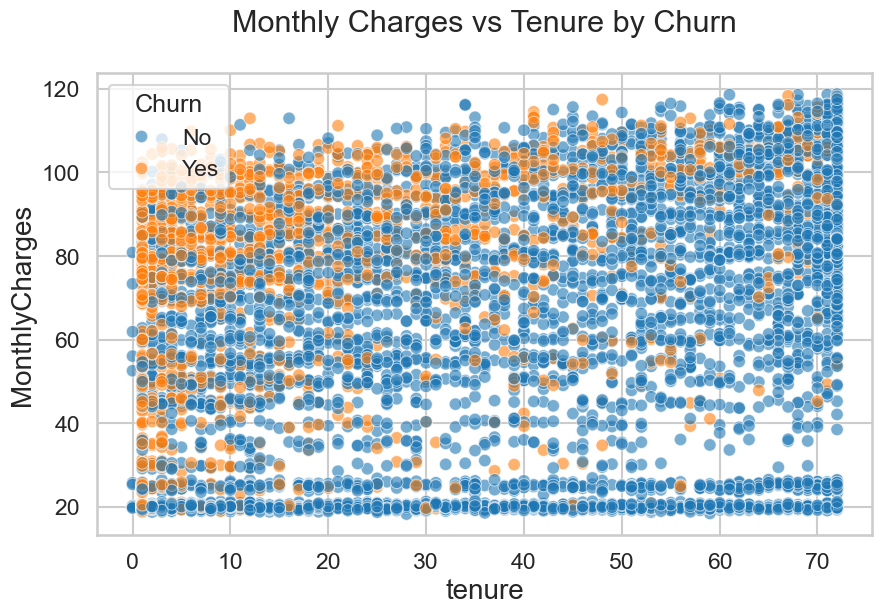

In [100]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title("Monthly Charges vs Tenure by Churn")
plt
plt.show()


### Insights -
* Customers with **short tenure** and **higher monthly charges** show a higher likelihood of **churn**, while **long-tenure** customers are more **stable** regardless of charges.

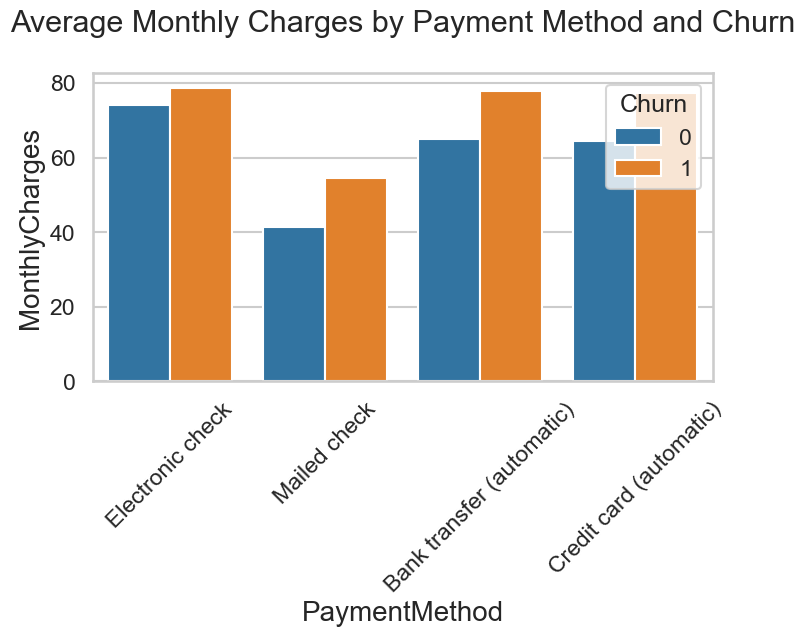

In [103]:
plt.figure(figsize=(8,4))
sns.barplot(data=new_df, x='PaymentMethod', y='MonthlyCharges', hue='Churn', errorbar=None, )
plt.title("Average Monthly Charges by Payment Method and Churn")
plt.xticks(rotation=45)
plt.show()


### Insights-
* Churning customers are paying higher monthly charges across all payment methods
* Customers paying via **Bank Transfer** ,**credit card** , **Electronic check** seems to churn more because of higher monthly charges.

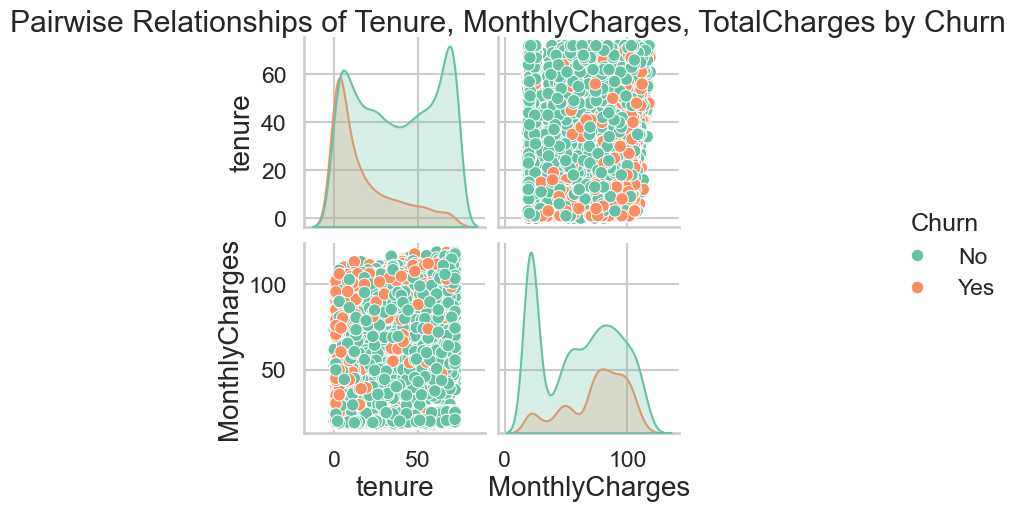

In [106]:
# Select numerical features + target
features = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]

# Pairplot with hue
sns.pairplot(df[features], hue="Churn", palette="Set2", diag_kind="kde")

plt.suptitle("Pairwise Relationships of Tenure, MonthlyCharges, TotalCharges by Churn", y=1.02)
plt.show()


### Insights -
The pairplot of **Tenure**, **MonthlyCharges**, and **TotalCharges** reveals that churned customers are concentrated in the region of **low tenure** and **high monthly charges** , whereas non-churned customers are spread across longer tenures and higher total charges. This suggests that early **dissatisfaction with pricing** may be a driver of churn

---
<div style="font-size:130%">

## Conclusion

From the exploratory data analysis of the Telco Customer Churn dataset, several patterns have emerged:  

**1. Customer Demographics:**  
- Gender does not significantly influence churn.  
- Senior citizens and customers without dependents or partners are more likely to churn.  

**2. Services and Subscriptions:**  
- Customers using **Fiber Optic internet**, **without online security/backups**, and **without tech support** show higher churn rates.  
- Absence of subscriptions to streaming services slightly correlates with higher churn.  

**3. Contract and Billing:**  
- **Month-to-month contracts**, **electronic check payments**, and **paperless billing** are associated with higher churn.  
- Customers on **1- or 2-year contracts** tend to stay longer.  

**4. Numerical Features:**  
- High **MonthlyCharges** with low **Tenure** results in low **TotalCharges**, and these customers are more likely to churn.  
- Customers with longer tenure show greater retention regardless of charges.  

**5. Multivariate Insights:**  
- Churn is primarily driven by **short tenure combined with high monthly charges**.  
- Across all payment methods, churned customers are concentrated in the **low tenure, high charge region**, indicating early dissatisfaction with pricing.  

**In short:** Customers who are new, paying high monthly charges, and lacking contract or subscription commitment are the most likely to churn. Longer-tenured customers and those with annual contracts are more stable.  

---

## Recommendations

1. **Pricing & Billing:**  
- Consider offering **discounted or tiered monthly plans** for new customers to reduce early churn.  
- Review billing strategies for high monthly charges to ensure customers perceive value.  

2. **Contracts & Retention:**  
- Encourage customers to adopt **1- or 2-year contracts** with incentives to improve retention.  
- Offer **loyalty benefits or discounts** for early contract renewal.  

3. **Service Improvements:**  
- Improve **tech support**, **online security**, and **backup facilities**, especially for Fiber Optic users.  
- Promote value-added services and streaming subscriptions to engage customers more.  

4. **Targeted Retention:**  
- Focus retention campaigns on **senior citizens, customers without dependents/partners**, and **high-paying new customers**.  
- Personalized offers and proactive customer support could reduce churn in these high-risk segments.  

5. **Monitoring & Analytics:**  
- Regularly monitor **Tenure vs MonthlyCharges patterns** to quickly identify early churn risks.  
- Use this EDA as a foundation to build predictive models for **churn prediction**.

</div>


In [110]:
new_df1.to_csv("cleaned_telco_churn.csv", index=False)   ### For ML Model Building.